In [2]:
import time

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [3]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 1000
generations = 1000
p_crossover = 0.7
p_mutation = 0.001
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size)

# Run optimzation and write to file
solution = ga.solve_tsp(tsp_data, p_crossover, p_mutation)
print(solution)
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

current generation best  2845
current generation best  2845
current generation best  2845
current generation best  2845
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2793
current generation best  2737
current generation best  2651
current generation best  2577
current generation best  2353
current generation best  2353
current generation best  2353
current generation best  2033
current generation best  2033
current generation best  2033
current generation best  2033
current generation best  2033
current generation best  2033
current generation best  2033
current generation best  1913
current generation best  1913
current ge

### Part 2: Path Finding Through Ant Colony Optimization

In [1]:
import time
import matplotlib as plt 
from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

# Please keep your parameters for the ACO easily changeable here
no_ants = 600 #number of ants
no_gen = 10 #number of generation
q = 1000
evap = 0.1
alpha = 1
beta = 5 
convergence_criterion = 10

# Construct the optimization objects
maze = Maze.create_maze("./../data/medium_maze.txt")
spec = PathSpecification.read_coordinates("./../data/medium_coordinates.txt")
prev_shortest_route_array = []
aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, alpha, beta, convergence_criterion)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
prev_shortest_route = aco.find_shortest_route(spec, prev_shortest_route_array)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
prev_shortest_route.write_to_file("./../data/medium_solution.txt")



# Print route size
print("Route size: " + str(prev_shortest_route.size()))


Ready reading maze file ./../data/medium_maze.txt


KeyboardInterrupt: 

In [2]:
print(prev_shortest_route_array)

[183, 183, 183, 181, 181, 177, 177, 177, 177, 177]


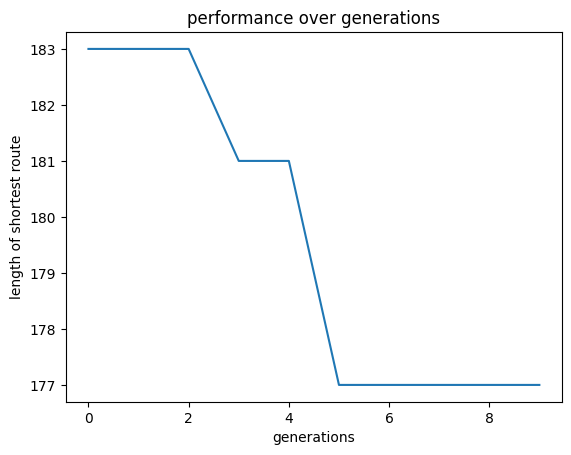

In [13]:
import matplotlib.pyplot as plt 

plt.plot(prev_shortest_route_array) 
plt.title("performance over generations")
plt.xlabel("generations")
plt.ylabel("length of shortest route")
plt.show()

### Synthesis

In [1]:
from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

# Please keep your parameters for the synthesis part easily changeable here
gen = 
no_gen = 30
q = 1000
evap = 0.1
alpha = 1 
beta = 5

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap, alpha, beta)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)
print("Done with ACO")
# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution = ga.solve_tsp(tsp_data2, 0.7, 0.001)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")

Ready reading maze file ./../data/hard_maze.txt


KeyboardInterrupt: 